# Part 1

In [2]:
# Load the dataset 
# https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016
import pandas as pd
file_path = '~/Documents/FA24/jhujourney/week_3/suicide.csv' 
df = pd.read_csv(file_path)

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.head()


N rows=27820, M columns=12


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Part 1.0.1 - What does the 'number of suicides / 100k' histogram look like from country to country?

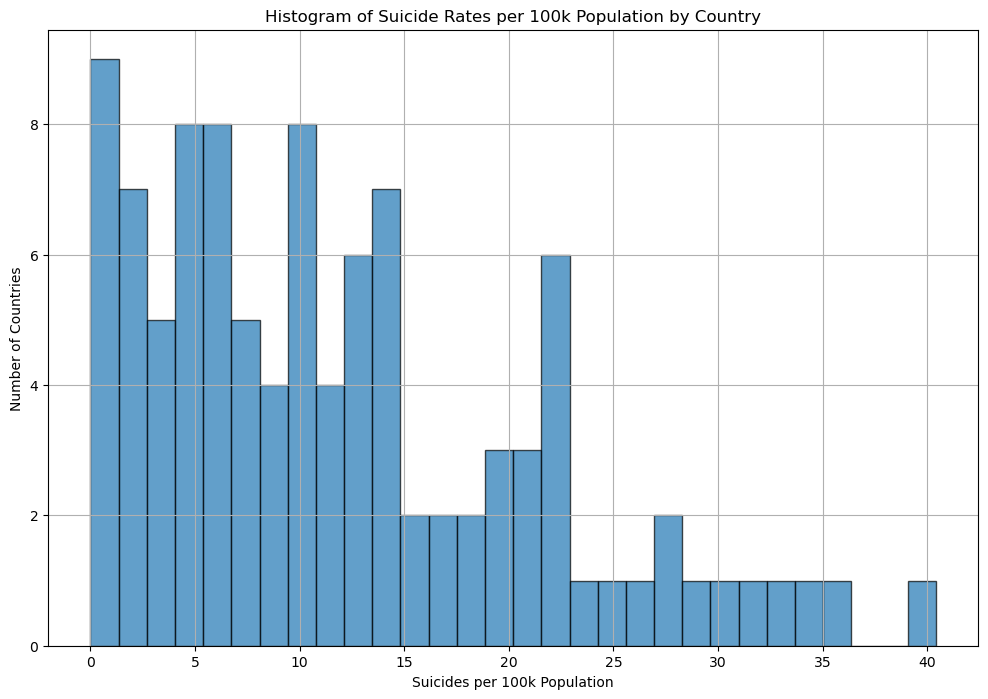

In [4]:
import matplotlib.pyplot as plt

# Group data by country and get the mean suicide rate per country
country_suicide_rates = df.groupby('country')['suicides/100k pop'].mean()

# Plot the histogram
plt.figure(figsize=(12, 8))
plt.hist(country_suicide_rates, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Suicide Rates per 100k Population by Country')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('Number of Countries')
plt.grid(True)
plt.show()

## Part 1.1 - What information would be the most important to "machine learn"? Can it be learned? 

### Part 1.1.1 - Examining GDP per capita and population

By examining variables such as GDP per capita, sex, age, population, and generation, we can analyze how these factors influence suicide rates across different countries and demographics. Given the severity of the issue, understanding these relationships could help policymakers allocate resources to high-risk populations.

In [8]:
# Explore the correlation between the numerical features (suicides/100k pop, GDP per capita, and population)
# and the target variable 'suicides/100k pop' to gain insights into important factors influencing suicide rates.

# Correlation matrix for numerical variables
correlation_matrix = df[['suicides/100k pop', 'gdp_per_capita ($)', 'population']].corr()

# Display the correlation matrix
correlation_matrix


,suicides/100k pop,gdp_per_capita ($),population
suicides/100k pop,1.000000,0.001785,0.008285
gdp_per_capita ($),0.001785,1.000000,0.081510
population,0.008285,0.081510,1.000000


There is a very weak positive correlation (0.0018) between GDP per capita and population, suggesting that GDP per capita alone may not be a strong predictor of suicide rates.
Similarly, there is a weak positive correlation (0.0083) between Population and suicide rate: indicating that population size also does not significantly correlate with suicide rates.

Given these weak correlations, other factors such as age, sex, and socioeconomic conditions (e.g., HDI or generational impacts) may play a more significant role.
We can now explore the categorical features like age and sex to see if they provide stronger insights into predicting high or low suicide rates.

### Part 1.1.2 - Examining sex and age 

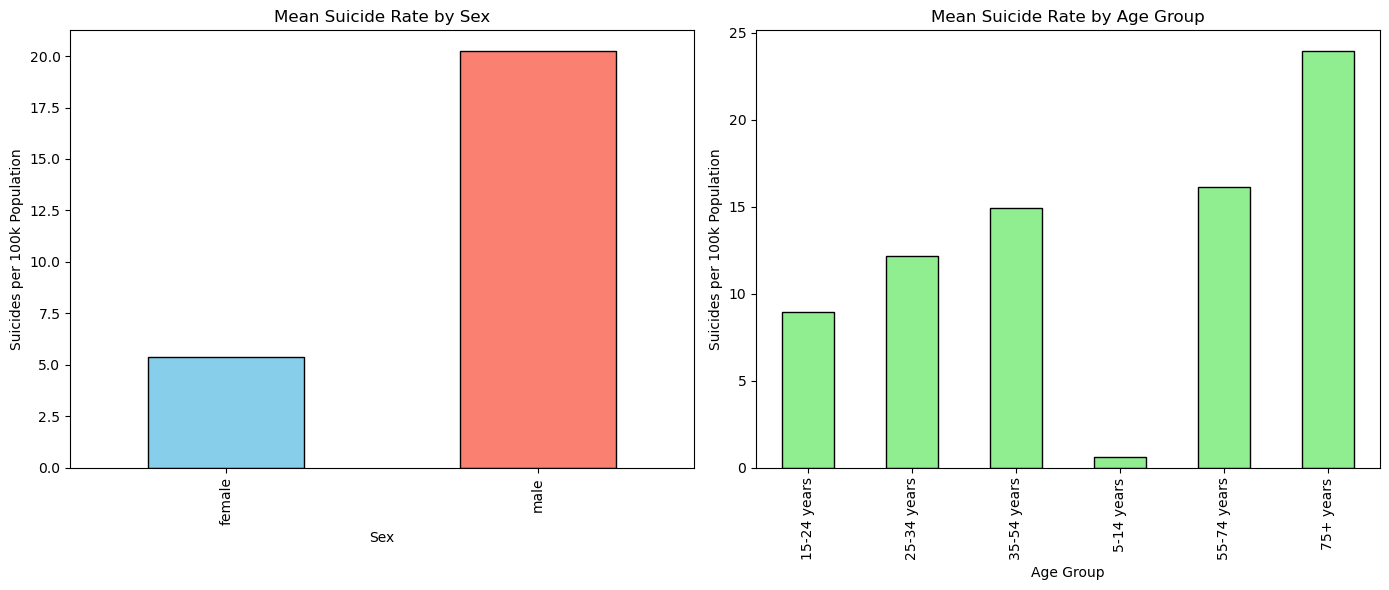

In [12]:
# Group the data by 'sex' and 'age' to calculate the mean suicide rate for each group.

# Group by sex and calculate mean suicide rate
sex_suicide_rate = df.groupby('sex')['suicides/100k pop'].mean()

# Group by age and calculate mean suicide rate
age_suicide_rate = df.groupby('age')['suicides/100k pop'].mean()

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for suicide rate by sex
sex_suicide_rate.plot(kind='bar', ax=ax[0], color=['skyblue', 'salmon'], edgecolor='black')
ax[0].set_title('Mean Suicide Rate by Sex')
ax[0].set_ylabel('Suicides per 100k Population')
ax[0].set_xlabel('Sex')

# Bar plot for suicide rate by age group
age_suicide_rate.plot(kind='bar', ax=ax[1], color='lightgreen', edgecolor='black')
ax[1].set_title('Mean Suicide Rate by Age Group')
ax[1].set_ylabel('Suicides per 100k Population')
ax[1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()


The mean suicide rate is significantly higher for males compared to females, indicating that sex is a strong predictor of suicide risk.

The suicide rate tends to increase with age, with the highest rates observed in the 75+ age group, followed by middle-aged groups. Younger age groups (15-24 years) show relatively lower suicide rates.
These results suggest that sex and age are critical factors in determining suicide risk, with older males being the most vulnerable group.

### Part 1.1.3 - Examining GDP per capita and generation

/var/folders/2m/pbh9rz1x3l5gnl1266bfvtr00000gn/T/ipykernel_41346/1039004375.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gdp_suicide_rate = df.groupby('gdp_per_capita_bin')['suicides/100k pop'].mean()


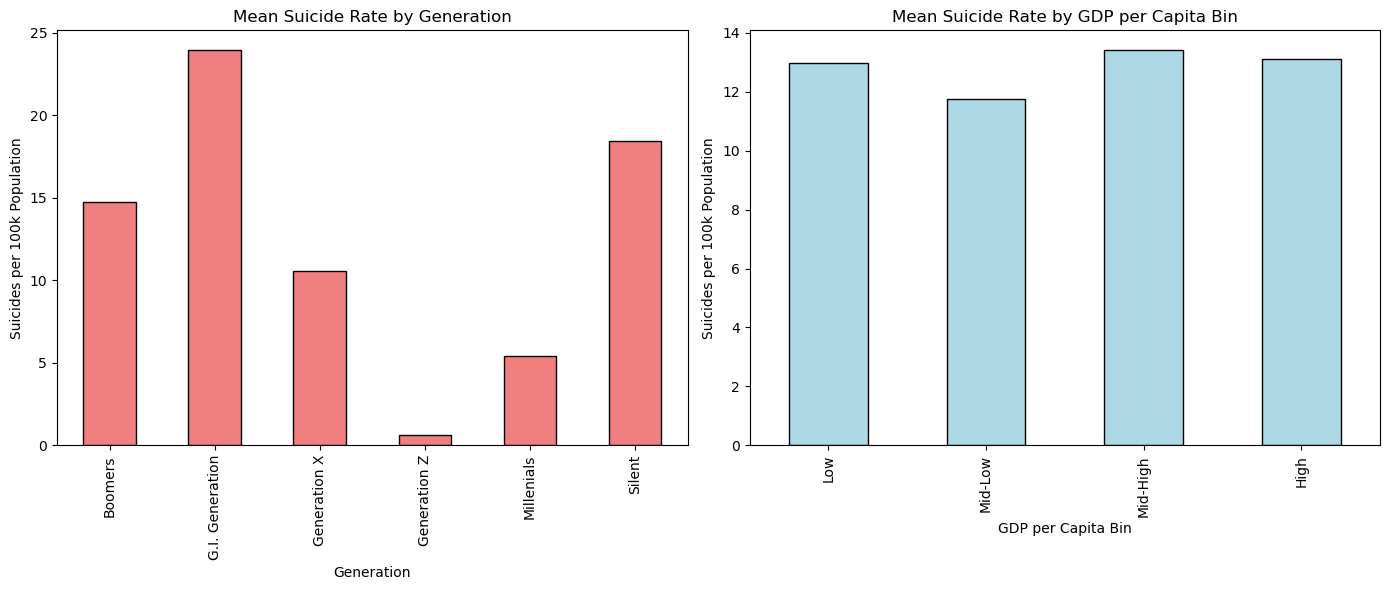

In [15]:
# Group by generation and calculate the mean suicide rate
generation_suicide_rate = df.groupby('generation')['suicides/100k pop'].mean()

# Group by GDP per capita bins to understand the effect of economic conditions
df['gdp_per_capita_bin'] = pd.qcut(df['gdp_per_capita ($)'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
gdp_suicide_rate = df.groupby('gdp_per_capita_bin')['suicides/100k pop'].mean()

# Plot the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for suicide rate by generation
generation_suicide_rate.plot(kind='bar', ax=ax[0], color='lightcoral', edgecolor='black')
ax[0].set_title('Mean Suicide Rate by Generation')
ax[0].set_ylabel('Suicides per 100k Population')
ax[0].set_xlabel('Generation')

# Bar plot for suicide rate by GDP per capita bin
gdp_suicide_rate.plot(kind='bar', ax=ax[1], color='lightblue', edgecolor='black')
ax[1].set_title('Mean Suicide Rate by GDP per Capita Bin')
ax[1].set_ylabel('Suicides per 100k Population')
ax[1].set_xlabel('GDP per Capita Bin')

plt.tight_layout()
plt.show()


The highest mean suicide rates are observed in the Silent Generation and the G.I. Generation, followed by the Boomers. Younger generations like Generation X and Millennials have lower suicide rates (in comparison), reflecting generational differences in suicide risk.

The suicide rate does not show a straightforward relationship with economic wealth. The Mid-High and Mid-Low GDP per capita groups have the highest mean suicide rates, while the Low and High groups show lower rates. This indicates that GDP per capita alone may not be a definitive predictor of suicide rates.

These results suggest that both generational and economic factors influence suicide risk, but the relationships are complex and influenced by additional factors like societal and cultural contexts.

### Part 1.1.4 - Can it be learned?

Yes, this information can be learned through machine learning classification models (e.g., logistic regression, decision trees, random forests). These models can look into relationships between the features (age, sex, economic conditions, generation) and the target variable (suicide rate) to make predictions. But suicide is complex, influenced by psychological, cultural, and other social factors that may not be fully visible within any dataset. Therefore, while machine learning can help identify high-risk groups, the predictions should be interpreted with caution and combined with SME knowledge.

---

# Part 2

## Part 2.1 - Explain in detail how one should set up the problem. Would it be a regression or a classification problem? 

Start by considering a **classification problem** where the goal is to predict whether a population’s suicide rate is "low" or "high" based on features like age, sex, GDP per capita, generation, and country. The target variable is the suicide rate, classified into two categories: "low" or "high."

1. Data Preprocessing:
Handle Missing Data: Imputation can be used to fill missing values in columns like the Human Development Index (HDI), or rows with missing values can be removed.

2. Categorical Encoding: Variables like age, sex, and generation are categorical and should be encoded (e.g., one-hot encoding) to convert them into a format suitable for machine learning algorithms.

3. Feature Scaling: Features like GDP per capita and population should be scaled to ensure they are on the same scale, which is essential for algorithms like logistic regression or SVM.

4. Train-Test Split:
Divide the dataset into training and test sets (e.g., 70% training, 30% test) to evaluate model performance effectively.

5. Model Selection:
Several classification algorithms are suitable for this task:

**Logistic Regression** is simple yet effective method, especially for interpretable results.
**Random Forests** is a robust model that handles interactions between features well and helps prevent overfitting.
**Support Vector Machine (SVM)**  Effective for binary classification, especially with high-dimensional data.
**Gradient Boosting (XGBoost, LightGBM)** Powerful algorithms that often perform well on structured/tabular data.

6. Evaluation Metrics:
Since this is a classification task, appropriate metrics may include:

**Accuracy** would help to measure an overall correctness of the model.
**Precision and Recall** is important when considering class imbalances much like those as predicting high suicide rates.
**F1 Score** would provides a balance between precision and recall.
**ROC-AUC** helps evaluate the model’s ability to distinguish between low and high suicide rates.

## Part 2.2 Would it be a regression or a classification problem? 

**Why Classification and Not Regression?** While suicide rates could be predicted as a continuous value in a regression task, this problem specifies classifying populations into binary categories. Thus, a **classification approach** is adequate. The binary target (suicide rate) makes classification the better fit since it simplifies the interpretation for decision-making.

## Part 2.3 - Is any unsupervised approach, to look for patterns, worthwhile?

Although this is a supervised learning problem, unsupervised learning (like clustering) could help in exploratory analysis. Clustering can reveal hidden patterns in the data, such as finding groups of countries or populations with similar risk profiles. Techniques like Principal Component Analysis (PCA) can reduce the dataset's dimensionality, helping identify the most important features and relationships.

## Part 2 Summary

This problem is best approached as a binary classification task. Data preprocessing, careful feature engineering, and using algorithms like logistic regression or random forests will be effective. Unsupervised learning could supplement this by uncovering hidden patterns in the data.

---

# Part 3 

### Part 3.1 - What Should Be the Dependent Variable?

The dependent variable, or the target variable, in this problem is a **binary classification** representing whether the suicide rate is "low" or "high" for a given population based on various features.

### Part 3.2 - How to Define the Dependent Variable:
1. **Suicides per 100k Population:** The dataset includes the suicide rate as "suicides/100k population," which is a continuous numerical value. To convert this into a binary target, we will apply a threshold to categorize suicide rates into "low" or "high."

2. **Setting the Threshold Using the Mean:** 
   - We will use the **mean** suicide rate as the threshold. If the suicide rate for a population is below the mean, it will be classified as "low," and if it’s above the mean, it will be classified as "high."
   
### Part 3.3 - Example:
- If the mean suicide rate is 12 suicides per 100k population:
   - Populations with a rate below 12 will be labeled as **"low"**.
   - Populations with a rate above 12 will be labeled as **"high"**.

### Part 3 Summary:
Using the mean suicide rate would highlight classification based on the overall data distribution. This approach simplifies the prediction task by focusing on identifying populations at higher risk of suicide (above the mean), which helps guide interventions and reveal key factors driving suicide risk.


---

# Part 4

Based on both the correlation analysis and categorical factor insights from **Part 1**, the rank of the independent variables in terms of their influence on the suicide rate are:

1. Sex (Males have significantly higher suicide rates).
2. Age (Older age groups have higher rates).
3. Generation (Older generations show higher rates).
4. Number of suicides (Moderate positive correlation with suicide rate).
5. Population (Weak correlation).
6. GDP per capita (Weakest correlation).


# Part 5

## Part 5.1 Key Features to Use

**Sex (One-hot encoded as male/female)** – Suicide rates show that they differ significantly between males and females.

**Age (One-hot encoded age groups)** – Age is a factor since older age groups show to have higher suicide rates.

**Generation (One-hot encoded)** – Generation can influence mental health and suicide rates due to different cultural and historical contexts.

**GDP per capita (Standardized)** – Provides an economic context for each country and might influence suicide rates.

**Year (Numerical)** – The year of the data collection, which could reveal trends over time.

**Population (Standardized)** – The population size for the demographic group.

**Number of suicides ('suicides_no') (Standardized)** – Strongly correlated with the suicide rate, so it's an important predictor.

## Part 5.2 Key Features to Drop

**Country-year** (since it's a derived feature).

**HDI for year** (if missing too many values).

## Part 5.3 Pre-Process the Data

In [39]:
# Implementing the preprocessing steps
from sklearn.preprocessing import StandardScaler

# Reloading the dataset
df = pd.read_csv(file_path)

# Dropping 'country-year' column if it exists
if 'country-year' in df.columns:
    df = df.drop(columns=['country-year'])

# Handling missing values: Check if 'HDI for year' exists and drop or impute
if 'HDI for year' in df.columns:
    hdi_missing_percentage = df['HDI for year'].isnull().mean() * 100
    if hdi_missing_percentage > 50:
        df = df.drop(columns=['HDI for year'])
    else:
        df['HDI for year'].fillna(df['HDI for year'].mean(), inplace=True)

# Encoding categorical variables: 'sex', 'age', 'generation'
df_encoded = pd.get_dummies(df, columns=['sex', 'age', 'generation'], drop_first=True)

# Standardizing numerical features: 'gdp_per_capita ($)', 'population', 'suicides_no'
scaler = StandardScaler()
df_encoded[['gdp_per_capita ($)', 'population', 'suicides_no']] = scaler.fit_transform(df_encoded[['gdp_per_capita ($)', 'population', 'suicides_no']])

# Dropping 'country' column and cleaning 'gdp_for_year ($)' column by removing extra spaces and converting to float
df_encoded = df_encoded.drop(columns=['country'])
df_encoded['gdp_for_year ($)'] = df_encoded[' gdp_for_year ($) '].replace({',': ''}, regex=True).astype(float)

# Dropping the old ' gdp_for_year ($) ' column with spaces
df_encoded = df_encoded.drop(columns=[' gdp_for_year ($) '])

# Display the first few rows of the processed dataset to verify the transformations
df_encoded.head()


,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($),sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent,gdp_for_year ($)
0,1987,-0.245639,-0.391617,6.71,-0.850864,True,False,False,False,False,False,False,True,False,False,False,2.156625e+09
1,1987,-0.251182,-0.392870,5.19,-0.850864,True,False,True,False,False,False,False,False,False,False,True,2.156625e+09
2,1987,-0.253400,-0.397548,4.83,-0.850864,False,False,False,False,False,False,False,True,False,False,False,2.156625e+09
3,1987,-0.267811,-0.466035,4.59,-0.850864,True,False,False,False,False,True,True,False,False,False,False,2.156625e+09
4,1987,-0.258943,-0.401485,3.28,-0.850864,True,True,False,False,False,False,False,False,False,False,False,2.156625e+09


# Part 6

In [41]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a binary target variable based on whether the suicide rate is above or below the mean
mean_suicide_rate = df_encoded['suicides/100k pop'].mean()
df_encoded['suicide_rate_category'] = np.where(df_encoded['suicides/100k pop'] > mean_suicide_rate, 1, 0)

# Split the dataset into features (X) and target (y)
X = df_encoded.drop(columns=['suicides/100k pop', 'suicide_rate_category'])
y = df_encoded['suicide_rate_category']

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier as a prototype model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix



(0.9805895039539899,
 '              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.99      5748\n           1       0.97      0.97      0.97      2598\n\n    accuracy                           0.98      8346\n   macro avg       0.98      0.98      0.98      8346\nweighted avg       0.98      0.98      0.98      8346\n',
 array([[5675,   73],
        [  89, 2509]]))